In [54]:
#Read the file
import pandas as pd
data = pd.read_csv("Reviews.csv")


In [35]:
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [4]:
#Displaying number of rows and columns
data.shape

(568454, 10)

In [5]:
data['Summary'].head()

0    Good Quality Dog Food
1        Not as Advertised
2    "Delight" says it all
3           Cough Medicine
4              Great taffy
Name: Summary, dtype: object

In [7]:
data['Text'].head()

0    I have bought several of the Vitality canned d...
1    Product arrived labeled as Jumbo Salted Peanut...
2    This is a confection that has been around a fe...
3    If you are looking for the secret ingredient i...
4    Great taffy at a great price.  There was a wid...
Name: Text, dtype: object

In [9]:
data.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [60]:
data.describe()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,568454.000000,568454.000000,568454.00000,568454.000000,5.684540e+05
mean,284227.500000,1.743817,2.22881,4.183199,1.296257e+09
std,164098.679298,7.636513,8.28974,1.310436,4.804331e+07
min,1.000000,0.000000,0.00000,1.000000,9.393408e+08
25%,142114.250000,0.000000,0.00000,4.000000,1.271290e+09
50%,284227.500000,0.000000,1.00000,5.000000,1.311120e+09
75%,426340.750000,2.000000,2.00000,5.000000,1.332720e+09
max,568454.000000,866.000000,923.00000,5.000000,1.351210e+09


In [8]:
#Displaying number of null values
data.isna().sum()

Id                         0
ProductId                  0
UserId                     0
ProfileName               26
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64

In [61]:
# Handle missing values
data["Summary"].fillna(data["Text"], inplace=True)


In [13]:
# Map Score to Sentiment
def map_score_to_sentiment(score):
    if score >= 4:
        return "Positive"
    elif score == 3:
        return "Neutral"
    else:
        return "Negative"
data["Sentiment"] = data["Score"].apply(map_score_to_sentiment)

In [15]:
# Compute Helpfulness Ratio
data["HelpfulnessRatio"] = data["HelpfulnessNumerator"] / data["HelpfulnessDenominator"].replace(0, 1)

In [16]:
# Convert Time to datetime format
data["Time"] = pd.to_datetime(data["Time"], unit="s")

In [18]:
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Sentiment,HelpfulnessRatio
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,2011-04-27,Good Quality Dog Food,I have bought several of the Vitality canned d...,Positive,1.0
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,2012-09-07,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,Negative,0.0
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,2008-08-18,"""Delight"" says it all",This is a confection that has been around a fe...,Positive,1.0
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,2011-06-13,Cough Medicine,If you are looking for the secret ingredient i...,Negative,1.0
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,2012-10-21,Great taffy,Great taffy at a great price. There was a wid...,Positive,0.0


In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,accuracy_score


In [20]:
X =data['Text']
Y = data['Sentiment']
vectorizer = TfidfVectorizer(max_features=500)
X_vectorized = vectorizer.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, Y, test_size=0.2, random_state=42)


In [21]:
# Train Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [22]:
# Evaluate the model
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

    Negative       0.64      0.51      0.57     16181
     Neutral       0.42      0.10      0.16      8485
    Positive       0.87      0.96      0.91     89025

    accuracy                           0.83    113691
   macro avg       0.64      0.52      0.55    113691
weighted avg       0.80      0.83      0.81    113691



In [24]:
score=accuracy_score(y_test,y_pred)
score

0.8320271613408273

In [67]:
# Combine y_test and y_pred into a DataFrame
comparison = pd.DataFrame({
    "Actual": y_test.tolist(),
    "Predicted": y_pred.tolist()
})

# Display comparison
print("\nComparison of Actual vs Predicted:")
print(comparison)



Comparison of Actual vs Predicted:
          Actual Predicted
0       Positive  Positive
1       Positive  Positive
2        Neutral  Positive
3       Negative  Positive
4       Positive  Positive
...          ...       ...
113686  Positive  Positive
113687  Positive  Positive
113688  Positive  Positive
113689  Positive  Positive
113690  Positive  Positive

[113691 rows x 2 columns]


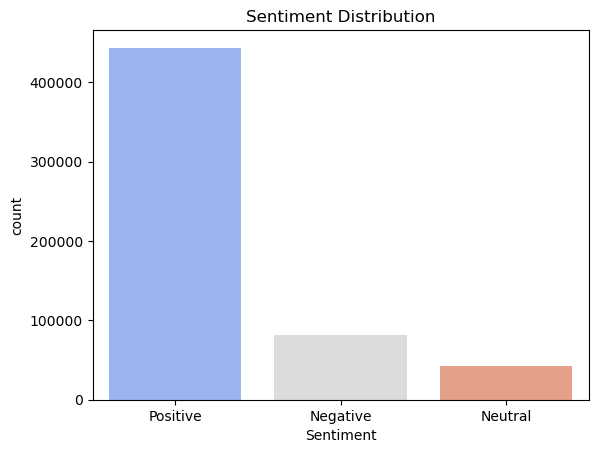

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x="Sentiment", data=data, palette="coolwarm")
plt.title("Sentiment Distribution")
plt.show()

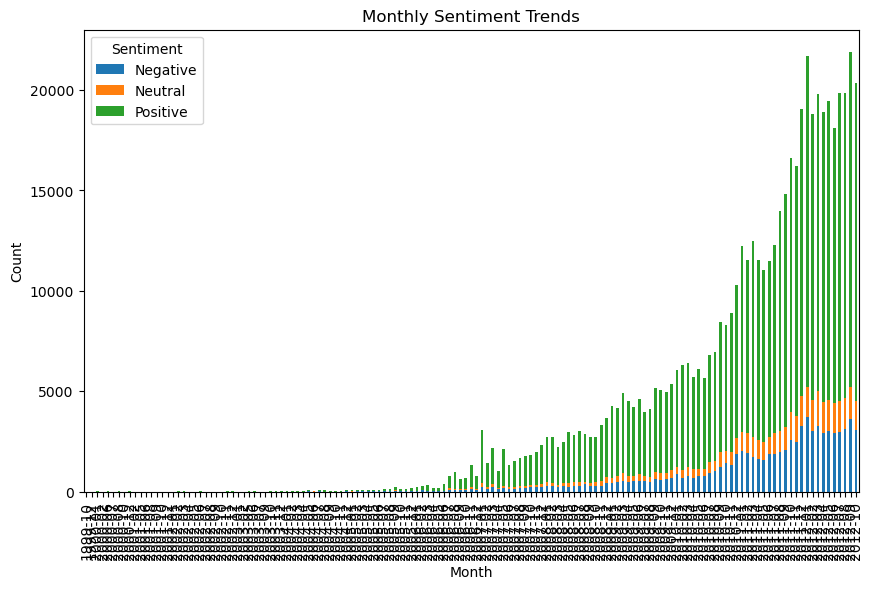

In [27]:
sentiment_trends = data.groupby(data["Time"].dt.to_period("M"))["Sentiment"].value_counts().unstack()
sentiment_trends.plot(kind="bar", stacked=True, figsize=(10, 6))
plt.title("Monthly Sentiment Trends")
plt.xlabel("Month")
plt.ylabel("Count")
plt.show()


In [68]:
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [47]:

df1= pd.DataFrame(data)
df1=data.iloc[:11]
df1

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
5,6,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,4,1342051200,Nice Taffy,I got a wild hair for taffy and ordered this f...
6,7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,5,1340150400,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...
7,8,B006K2ZZ7K,A3JRGQVEQN31IQ,Pamela G. Williams,0,0,5,1336003200,"Wonderful, tasty taffy",This taffy is so good. It is very soft and ch...
8,9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5,1322006400,Yay Barley,Right now I'm mostly just sprouting this so my...
9,10,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for thei...


# Hugging face sentiment analysis model

In [49]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from scipy.special import softmax
import pandas as pd

# Load your dataset
data2 = df1

# Load a pre-trained Hugging Face sentiment analysis model
model_name = "distilbert-base-uncased-finetuned-sst-2-english"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

# Function to analyze sentiment
def analyze_sentiment(text):
    # Tokenize input text
    inputs = tokenizer(text, return_tensors="pt", truncation=True, max_length=512)
    outputs = model(**inputs)

    # Get sentiment scores and label
    scores = outputs.logits.detach().numpy()[0]
    probabilities = softmax(scores)  # Convert logits to probabilities
    label = "POSITIVE" if probabilities[1] > probabilities[0] else "NEGATIVE"
    return label, probabilities[1] if label == "POSITIVE" else probabilities[0]

# Apply sentiment analysis to the "Text" column only
data2[["PredictedSentiment", "SentimentScore"]] = data2["Text"].apply(
    lambda x: pd.Series(analyze_sentiment(x))
)
# Summarize sentiment analysis
summary = {
    "Total Reviews": len(data2),
    "Positive Reviews": len(data2[data2["PredictedSentiment"] == "POSITIVE"]),
    "Negative Reviews": len(data2[data2["PredictedSentiment"] == "NEGATIVE"]),
    "Average Positive Score": data2[data2["PredictedSentiment"] == "POSITIVE"]["SentimentScore"].mean(),
    "Average Negative Score": data2[data2["PredictedSentiment"] == "NEGATIVE"]["SentimentScore"].mean(),
}

# Display results
print("=== Sentiment Analysis Summary ===")
for key, value in summary.items():
    print(f"{key}: {value}")

print("\n=== Dataset with Sentiment Analysis Results ===")
print(data2)


=== Sentiment Analysis Summary ===
Total Reviews: 11
Positive Reviews: 10
Negative Reviews: 1
Average Positive Score: 0.9928680658340454
Average Negative Score: 0.9995254278182983

=== Dataset with Sentiment Analysis Results ===
    Id   ProductId          UserId                      ProfileName  \
0    1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1    2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2    3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3    4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4    5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   
5    6  B006K2ZZ7K   ADT0SRK1MGOEU                   Twoapennything   
6    7  B006K2ZZ7K  A1SP2KVKFXXRU1                David C. Sullivan   
7    8  B006K2ZZ7K  A3JRGQVEQN31IQ               Pamela G. Williams   
8    9  B000E7L2R4  A1MZYO9TZK0BBI                         R. James   
9   10  B00171APVA  A21BT40VZCCYT4                    Carol A

/var/folders/1v/d9hxqndn03v_fcs9vlm0c9yr0000gn/T/ipykernel_4800/1432976859.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2[["PredictedSentiment", "SentimentScore"]] = data2["Text"].apply(
/var/folders/1v/d9hxqndn03v_fcs9vlm0c9yr0000gn/T/ipykernel_4800/1432976859.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2[["PredictedSentiment", "SentimentScore"]] = data2["Text"].apply(


In [52]:
data2

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,PredictedSentiment,SentimentScore
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,POSITIVE,0.998385
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,NEGATIVE,0.999525
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,POSITIVE,0.999765
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,POSITIVE,0.999153
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,POSITIVE,0.998708
5,6,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,4,1342051200,Nice Taffy,I got a wild hair for taffy and ordered this f...,POSITIVE,0.999255
6,7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,5,1340150400,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...,POSITIVE,0.999364
7,8,B006K2ZZ7K,A3JRGQVEQN31IQ,Pamela G. Williams,0,0,5,1336003200,"Wonderful, tasty taffy",This taffy is so good. It is very soft and ch...,POSITIVE,0.999883
8,9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5,1322006400,Yay Barley,Right now I'm mostly just sprouting this so my...,POSITIVE,0.998517
9,10,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for thei...,POSITIVE,0.999456
